# Our Team
Group 17 Team members:
1. Youssef Abadeer (20879646)
2. Ashvin Grewal (20851001)
3. Devansh Kaloti (20876845)
4. Jagnoor Sangha (20901896)

# Introduction

Our main project idea was to predict the salary of job postings available on LinkedIn given certain features and descriptions available to us in those job descriptions. We chose to focus on studying and predicting job position salaries for three primary reasons. Firstly, a lack of salary transparency can place candidates at a significant disadvantage, particularly when considering multiple job offers with varying timelines. In many places, companies are not legally required to report salary ranges for positions, making it difficult for candidates to make informed decisions about which offers to accept.

Secondly, we want to provide applicants with a fair evaluation of what they should be paid, using recent legislation as a guide. Consider California’s new Bill for example, ([“California Releases Guidance on Pay Transparency Law”](https://www.shrm.org/resourcesandtools/legal-and-compliance/state-and-local-updates/pages/california-pay-transparency-guidance.aspx), 2022), which requires companies to post a salary range with each job posting. While companies in some regions must now publish pay ranges, these ranges can be so large that they do not provide much insight into what a particular candidate can expect to earn. Our project aims to provide candidates with a more accurate estimate of their expected pay, using machine learning and natural language processing techniques to analyze job postings and position details.

Lastly, we believe that transparency around compensation is crucial for building trust between employers and employees, and creating a positive work environment. When employees have a good understanding of how their pay is determined, they are more likely to feel appreciated and respected by their employer. Additionally, pay transparency can help to identify and address discrimination and bias in the workplace. By providing candidates with more information about the salary range for a particular job, we hope to contribute to a more equitable and inclusive job market.

# Data description

Dataset Links (jobs.csv):

1. [Original datataset](https://github.com/Mlawrence95/LinkedIn-Tech-Job-Data)
2. [Dataset in Google Drive in case Github download fails](https://drive.google.com/drive/folders/1YU0CRhjoPILIYbJH5OAGBnKmKkJbO4F1?usp=sharing)

Dataset Description:

We will be utilizing a free publicly available data set on LinkedIn job postings. This data set has features which we can use as variables and derive insights from, in order to perform supervised learning and provide a salary prediction for these postings (Dataset linked above, and in bibliography as well).

The dataset is a public github repository in which a user scraped a compilation of job posts and metadata from various tech categories on LinkedIn.


## Import Data

Neccessary imports:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
# use color codes in the plots geenrated by seaborn
sns.set(color_codes=True)
import plotly.express as px


Loading the dataset into the notebook:

In [7]:
from google.colab import drive
drive.mount('/content/drive')
#Commented out in case file is to be uploaded
# from google.colab import files 
# uploaded_files = files.upload() # upload file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Commented out unless file is uploaded
# import io
# data = io.BytesIO(uploaded_files['jobs.csv']) # read file

## Reading Data

Creating the dataframe:

**Note:**

**Please upload the jobs.csv file to your Google Drive if you intend to run this command. Alternatively, if you don't plan to use Google Drive, you can comment out the first line and uncomment the second line to upload the CSV file here directly.**

In [9]:
df_jobs = pd.read_csv('drive/MyDrive/Colab Notebooks/446_project/jobs.csv') #If you connected to drive
# df_jobs = pd.read_csv('jobs.csv')  #If you uploaded the file


Checking a snapshot of the dataframe:

In [10]:
df_jobs.head()

,Employment type,Industries,Job function,Seniority level,company,company_id,context,date,description,education,location,months_experience,post_id,post_url,sal_high,sal_low,salary,title
0,Full-time,Broadcast Media,Information Technology,Mid-Senior level,CyberCoders,21836.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Job Title: Senior Data Engineer Location: Alex...,bachelor degree,"Alexandria, VA",60.0,2632814552,https://www.linkedin.com/jobs/view/senior-data...,NaN,NaN,NaN,Senior Data Engineer
1,Full-time,"Hospital & Health Care, Medical Devices, and P...",Engineering and Information Technology,Not Applicable,Johnson & Johnson,1207.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,"Ethicon, part of Johnson & Johnson Medical Dev...",bachelor degree,"Santa Clara, CA",96.0,2632810866,https://www.linkedin.com/jobs/view/principal-f...,NaN,NaN,NaN,Principal Full Stack Software Engineer.
2,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Washington, DC",84.0,2632812746,https://www.linkedin.com/jobs/view/senior-soft...,189000.0,120000.0,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer
3,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Reston, VA",84.0,2632817427,https://www.linkedin.com/jobs/view/senior-soft...,189000.0,120000.0,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer
4,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Irving, TX",84.0,2632817426,https://www.linkedin.com/jobs/view/senior-soft...,175000.0,108000.0,"$108,000.00/yr - $175,000.00/yr",Senior Software Engineer


**Data investigation:** 

In [11]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employment type    7768 non-null   object 
 1   Industries         7172 non-null   object 
 2   Job function       7172 non-null   object 
 3   Seniority level    7172 non-null   object 
 4   company            8261 non-null   object 
 5   company_id         7780 non-null   float64
 6   context            7685 non-null   object 
 7   date               7626 non-null   object 
 8   description        7780 non-null   object 
 9   education          7527 non-null   object 
 10  location           8261 non-null   object 
 11  months_experience  5090 non-null   float64
 12  post_id            8261 non-null   int64  
 13  post_url           8261 non-null   object 
 14  sal_high           2135 non-null   float64
 15  sal_low            2135 non-null   float64
 16  salary             2145 

The columns are currently of type object, float64, and int64. In this dataset, there are both numeric and categorical variables. The 'salary' column data will have to be converted from type object to type float64.

In this current moment, our outcome will be either sal_high, sal_low, or salary. Further investigation will be done to see which option is best. Necessary and unnecessary features are yet to be investigated.

Before features are further investigated on what is necessary or useful for predictions, there are some rows that have any of the salary columns as NaN (null).

In [12]:
df_jobs = df_jobs.dropna(subset=['salary'])

In [13]:
df_jobs['salary'].isnull().values.sum()

0

In [14]:
df_jobs.head()

,Employment type,Industries,Job function,Seniority level,company,company_id,context,date,description,education,location,months_experience,post_id,post_url,sal_high,sal_low,salary,title
2,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Washington, DC",84.0,2632812746,https://www.linkedin.com/jobs/view/senior-soft...,189000.0,120000.0,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer
3,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Reston, VA",84.0,2632817427,https://www.linkedin.com/jobs/view/senior-soft...,189000.0,120000.0,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer
4,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Irving, TX",84.0,2632817426,https://www.linkedin.com/jobs/view/senior-soft...,175000.0,108000.0,"$108,000.00/yr - $175,000.00/yr",Senior Software Engineer
5,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Atlanta, GA",84.0,2632813731,https://www.linkedin.com/jobs/view/senior-soft...,172000.0,106000.0,"$106,000.00/yr - $172,000.00/yr",Senior Software Engineer
6,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.0,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Charlotte, NC",84.0,2632813729,https://www.linkedin.com/jobs/view/senior-soft...,170000.0,105000.0,"$105,000.00/yr - $170,000.00/yr",Senior Software Engineer


In [15]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 2 to 8258
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employment type    2145 non-null   object 
 1   Industries         2085 non-null   object 
 2   Job function       2085 non-null   object 
 3   Seniority level    2085 non-null   object 
 4   company            2145 non-null   object 
 5   company_id         2145 non-null   float64
 6   context            2106 non-null   object 
 7   date               1921 non-null   object 
 8   description        2145 non-null   object 
 9   education          2092 non-null   object 
 10  location           2145 non-null   object 
 11  months_experience  1433 non-null   float64
 12  post_id            2145 non-null   int64  
 13  post_url           2145 non-null   object 
 14  sal_high           2135 non-null   float64
 15  sal_low            2135 non-null   float64
 16  salary             2145 

## Dataset Discussion

Let's investigate each column of the dataset, understand it, and determine whether it can be useful for predicting salary or should be dropped.

*   **Employment type:**
This column displays the type of employment the job posting is looking for, full-time, part-time, etc.

This is definitely a feature that could lead to good correlations and should be kept.





In [16]:
df_jobs['Employment type'].unique()

array(['Full-time', 'Contract', 'Internship', 'Temporary', 'Part-time'],
      dtype=object)

*   **Industries:**
This definitely at surface level seems to be a strong predictor for salary, though it is not entirely clear whether this attribute is decided by the company who posted the posting or whether it is a selection that LinkedIn decides and the company selects it.

If it is the first option, there are chances for the same industry to be worded slightly different and considered as 'different' industries by the algorithm. However, it can still be used as long as there are not too many differentiations.

However, there is a technique which we plan to use, regularization (lasso or ridge) to reduce the coefficient of unimportant features in case the algorithm deems this feature not to be as strong and would not impact the algorithm and can remove potential bias when testing on new data.


In [17]:
df_jobs['Industries'].unique()

array(['Computer Hardware, Computer Software, and Information Technology and Services',
       nan,
       'Hospital & Health Care, Medical Devices, and Pharmaceuticals',
       'Information Technology and Services, Computer Software, and Internet',
       'Information Technology and Services', 'Management Consulting',
       'Automotive and Marketing and Advertising',
       'Information Technology and Services, Computer Software, and Financial Services',
       'Consumer Electronics', 'Staffing and Recruiting',
       'Financial Services',
       'Consumer Goods, Food & Beverages, and Retail',
       'Computer Software',
       'Machinery, Mechanical or Industrial Engineering, and Staffing and Recruiting',
       'Computer Software, Information Technology and Services, and Internet',
       'Information Technology and Services, Defense & Space, and Computer Software',
       'Banking', 'Pharmaceuticals, Biotechnology, and Medical Devices',
       'Electrical/Electronic Manufacturing,

*   **Job function:**
Pretty straightforward, it lists what the job function is, related to the degree/title/field the job position is.

From the dataframe.head() snippet, it was not evidently clear how many unique attributes the column contains. A quick look at the unique values showcases that this is likely to be a strong feature to use in predictions.


In [18]:
df_jobs['Job function'].unique()

array(['Engineering and Information Technology', nan,
       'Information Technology and Consulting',
       'Advertising and Marketing', 'Quality Assurance',
       'Information Technology',
       'Quality Assurance, Information Technology, and Engineering',
       'Management and Strategy/Planning', 'Other',
       'Information Technology, Consulting, and Engineering',
       'Engineering', 'Consulting and Information Technology',
       'Engineering, Information Technology, and Manufacturing',
       'Finance and Sales', 'Business Development and Sales',
       'Information Technology, Engineering, and Management',
       'Design, Consulting, and Engineering',
       'Engineering, Research, and Science',
       'Engineering, Information Technology, and Other',
       'Project Management, Information Technology, and Engineering',
       'Quality Assurance, Information Technology, and Other',
       'Information Technology, Research, and Engineering', 'Research',
       'Information 

*   **Seniority level:**
Simple to understand, it lists what the seniority level of the job is.

The dataframe.head() snippet only showed Not Applicable, but after returning the unique values within the column, it can be a strong feature to be used to predict salary.


In [19]:
df_jobs['Seniority level'].unique()

array(['Not Applicable', nan, 'Entry level', 'Mid-Senior level',
       'Associate', 'Director', 'Internship', 'Executive'], dtype=object)



Simple to understand, lists what company is hiring.

Definitely could be a strong predictor for salary

*   **company:**
This column lists the name of the company that is hiring. It could be a strong predictor for salary.

In [20]:
df_jobs['company'].unique()

array(['Microsoft', 'Cleerly', 'Johnson & Johnson', 'PatientPop Inc.',
       'Mindtree', 'io173', 'Insight Global', 'Modis', 'T-Mobile',
       'Apple', 'IDR, Inc.', 'FIA Tech', 'ICE',
       'ComTec Information Systems (IT)', 'Starbucks', 'SiteZeus',
       'January AI', '3M', 'Amazon', 'Noblis', 'Capital One', 'Groq',
       'Roche', 'Ciitizen', 'Tula Technology Inc.',
       'Quantitative Systems', 'Zillow', 'Tesla', 'Aurora', 'Verusen',
       'Sense Corp', 'Pony.ai', 'Mozilla', 'Urbint', 'DataVisor',
       'LAAgencia', 'OM1, Inc.', 'Cisco Meraki', 'Jefferson Frank',
       'General Dynamics Mission Systems', 'OpenAI', 'Amtrak',
       'Motion Recruitment', 'Teledyne Controls', 'Pearson',
       'Caterpillar Inc.', '1872 Consulting', 'NBCUniversal Media, LLC',
       'Walter Bacon, Inc.', 'RMS', 'Naval Nuclear Laboratory (FMP)',
       'PriceSenz', 'Qerala', 'Yield Engineering Systems',
       'Lightwave Recruiting', 'LeadingReach', 'The Verity Group, L.L.C.',
       'PC-Doctor, 

*   **company_id:**

Company_ID - While on first glance you would think this column can be dropped as it  is just an integer value representing the Company, but can seem redundent since we already have a Company column, this is actually extremely beneficial from creating skewed predictions in the niche but possible case of where companies can have the same name. 

*   **context**

Context - From the dataframe.head() snippet context is very clearly a biproduct of how the data was collected (web scraping) and can be dropped as it does not help in prediting Salary

*   **date**

Date will be dropped as it does not seem to be of value as it just indicates the time of when the job was posted.

In [21]:
df_jobs['date'].unique()

array([nan, '2021-07-15 15:03:51.829002', '2021-07-15 15:04:02.688839',
       ..., '2021-10-17 23:49:58.335753', '2021-10-17 23:50:51.391937',
       '2021-10-17 23:51:05.271522'], dtype=object)

*   **description**

As the name implies, the description column contains what was in the description section of the job posting, it is not a good use of a predictor as it would be all text and require the use of NLP's to tokenize the text and find what in the description can be useful for salary, since there are other features which seem to be strong predictors it is not needed to have this column and it can be dropped

In [22]:
df_jobs['description'].unique()

array(["Microsoft’s WCB health team is looking for a Senior Software Engineer who loves to learn, solve challenges, and be a part of a team working to collaborate with healthcare partners to help people navigate complicated systems such as healthcare. You may have worked on similar projects, or you're looking for a new adventure. To be successful in this role, you value open communication and breaking down technical complexity. You are energized by sharing the knowledge you hold to improve the team you are on. You are capable of visualizing and driving toward long-term success while addressing and solving for immediate uncertainties. You are comfortable dealing with the ambiguities that come from being the driving force for change in an industry. You embrace diversity of experience and thought. You’re a tireless advocate for the customer and great engineering practices—enthusiastic about building and iterating on designs to discover what works best and applying your knowledge to create

*   **location**
Lists the location of where the job position is located, could be useful in predicting salary

In [23]:
df_jobs['location'].unique()

array(['Washington, DC', 'Reston, VA', 'Irving, TX', 'Atlanta, GA',
       'Charlotte, NC', 'Denver, CO', 'Redmond, WA', 'Chicago, IL',
       'San Diego, CA', 'Miami, FL', 'Titusville, NJ', 'Los Angeles, CA',
       'Bellevue, WA', 'Boston, MA', 'West Chicago, IL',
       'Jacksonville, FL', 'Frisco, TX', 'Cupertino, CA', 'Seattle, WA',
       'Raleigh-Durham-Chapel Hill Area', 'Austin, TX', 'Westminster, CO',
       'Culver City, CA', 'Nashville Metropolitan Area', 'Melbourne, FL',
       'Tampa, FL', 'Menlo Park, CA', 'Pittsburgh, PA', 'New York, NY',
       'Richmond, VA', 'Mountain View, CA', 'Indianapolis, IN',
       'Palo Alto, CA', 'San Jose, CA', 'Honolulu, HI',
       'Washington, United States', 'Fremont, CA', 'San Francisco, CA',
       'Bellwood, GA', 'Houston, TX', 'Raritan, NJ', 'United, PA',
       'New York, United States', 'Thousand Oaks, CA', 'Frankfort, KY',
       'Mossville, IL', 'Englewood Cliffs, NJ',
       'New York City Metropolitan Area', 'Los Angeles Metro

*  **months_experience**

Column just shows how much months experience is required for the specific job. Likely to be useful for predicting salary

*   **post_id**

Similar to company_id, for the same reasonings there may be the case where a company can do multiple job posts for the same role and this can be used as a unique identifier to check and ensure there are no duplicate entries within this dataset

*   **post_url**

This can be easily dropped as it just contains the weblink to the job posting on LinkedIN

*   **sal_high**

It is the upper bound from the salary column, will keep for now, but will be adjusted or used later.

*   **sal_low**
It is the lower bound from the salary column, again, will keep for now but will be adjusted/used later

*   **salary**
A string column showing the salary range of the job posting, it is the target for prediction but there will be manipulation later as a string column and range are not able to handle predictions


*   **title** 
Lists the title of the job position, also could be useful in predictions

In [24]:
df_jobs['title'].unique()

array(['Senior Software Engineer', 'Staff - Data Scientist',
       'Software Engineer', 'Scientist 5 Data Science.',
       'Software Engineer, Backend', 'Software Engineer In Test',
       'Data Engineer - Machine Learning', 'Data Entry/Analyst',
       'Remote Software Engineer',
       'Assoc Engineer, Software (RPA Developer)',
       'Software Engineer, Web - iWork', 'Software Engineer - Notes',
       'Software Data Engineer, Analytics - Apple Media Products',
       'Software Engineer - Photos', 'Software Engineer (C#)',
       'Senior Software Engineer- Apple TV Services',
       'Motion Software Engineer',
       'Senior Software Engineer, Algo - Ad Platforms',
       'Java Software Engineer', 'Systems Software Engineer',
       'Cellular Software QA Engineer',
       'Computer Vision Algorithm Engineer',
       'Senior Software Engineer - Apple Media Products', 'Data Analyst',
       'Senior C++ Software Engineer',
       'Software Quality Assurance Engineer', 'data scientis

## Data Cleaning, Transformations, and Feature Engineering

Just to recap, the columns being dropped are: context, date, post_url, and description

In [25]:
df_jobs = df_jobs.drop(columns=['date', 'context', 'post_url', 'description'])

We should check for any duplicates within the dataframe

In [26]:
duplicate_rows = df_jobs.duplicated()

In [27]:
num_duplicate_rows = sum(duplicate_rows)

In [28]:
print(f'Number of duplicate rows: {num_duplicate_rows}')

Number of duplicate rows: 0


Since there are no duplicate rows, the unique identifiers company_id and post_id can be dropped

In [29]:
df_jobs = df_jobs.drop(columns=['post_id', 'company_id'])

In [30]:
df_jobs.head()

,Employment type,Industries,Job function,Seniority level,company,education,location,months_experience,sal_high,sal_low,salary,title
2,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Washington, DC",84.0,189000.0,120000.0,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer
3,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Reston, VA",84.0,189000.0,120000.0,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer
4,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Irving, TX",84.0,175000.0,108000.0,"$108,000.00/yr - $175,000.00/yr",Senior Software Engineer
5,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Atlanta, GA",84.0,172000.0,106000.0,"$106,000.00/yr - $172,000.00/yr",Senior Software Engineer
6,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Charlotte, NC",84.0,170000.0,105000.0,"$105,000.00/yr - $170,000.00/yr",Senior Software Engineer


In [31]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 2 to 8258
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employment type    2145 non-null   object 
 1   Industries         2085 non-null   object 
 2   Job function       2085 non-null   object 
 3   Seniority level    2085 non-null   object 
 4   company            2145 non-null   object 
 5   education          2092 non-null   object 
 6   location           2145 non-null   object 
 7   months_experience  1433 non-null   float64
 8   sal_high           2135 non-null   float64
 9   sal_low            2135 non-null   float64
 10  salary             2145 non-null   object 
 11  title              2145 non-null   object 
dtypes: float64(3), object(9)
memory usage: 217.9+ KB


There is one last column missing from this dataframe before further changes can be made. There is a salary low and a salary high, but no average salary. This column is essential, as stated in the project proposal, to provide the best estimate for the expected salary of job positions.


In [32]:
df_jobs['Average Salary'] = (
    (df_jobs['sal_high']+df_jobs['sal_low'])/2
    )

In [33]:
df_jobs.head()

,Employment type,Industries,Job function,Seniority level,company,education,location,months_experience,sal_high,sal_low,salary,title,Average Salary
2,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Washington, DC",84.0,189000.0,120000.0,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer,154500.0
3,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Reston, VA",84.0,189000.0,120000.0,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer,154500.0
4,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Irving, TX",84.0,175000.0,108000.0,"$108,000.00/yr - $175,000.00/yr",Senior Software Engineer,141500.0
5,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Atlanta, GA",84.0,172000.0,106000.0,"$106,000.00/yr - $172,000.00/yr",Senior Software Engineer,139000.0
6,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,bachelor degree,"Charlotte, NC",84.0,170000.0,105000.0,"$105,000.00/yr - $170,000.00/yr",Senior Software Engineer,137500.0


In [34]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 2 to 8258
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employment type    2145 non-null   object 
 1   Industries         2085 non-null   object 
 2   Job function       2085 non-null   object 
 3   Seniority level    2085 non-null   object 
 4   company            2145 non-null   object 
 5   education          2092 non-null   object 
 6   location           2145 non-null   object 
 7   months_experience  1433 non-null   float64
 8   sal_high           2135 non-null   float64
 9   sal_low            2135 non-null   float64
 10  salary             2145 non-null   object 
 11  title              2145 non-null   object 
 12  Average Salary     2135 non-null   float64
dtypes: float64(4), object(9)
memory usage: 234.6+ KB


Now that we have our dataset with the 'ideal' columns, we need to address the issue of certain columns that contain null values before proceeding with any visualization of trends.


In [35]:
print(df_jobs.isnull().sum())

Employment type        0
Industries            60
Job function          60
Seniority level       60
company                0
education             53
location               0
months_experience    712
sal_high              10
sal_low               10
salary                 0
title                  0
Average Salary        10
dtype: int64


As noted, there are no null values in the 'salary' column, but there are 10 null values in the numerical 'sal_low' and 'sal_high' columns. Therefore, if the salary information can be extracted from the string values in the 'salary' column and used to populate the 'sal_low', 'sal_high', and 'avg_salary' columns, it would be beneficial.

In [36]:
df_jobs[df_jobs['sal_low'].isna()]

,Employment type,Industries,Job function,Seniority level,company,education,location,months_experience,sal_high,sal_low,salary,title,Average Salary
2959,Full-time,"Computer Software, Internet, and Information T...",Information Technology and Engineering,Mid-Senior level,EasyPost,bachelor degree,"Utah, United States",36.0,NaN,NaN,$0.00/yr - $0.00/yr,Data Scientist,NaN
3060,Full-time,"Computer Software, Internet, and Information T...",Information Technology and Engineering,Mid-Senior level,EasyPost,bachelor degree,"New Jersey, United States",36.0,NaN,NaN,$0.00/yr - $0.00/yr,Data Scientist,NaN
3159,Full-time,Logistics and Supply Chain,Engineering and Information Technology,Associate,GEODIS,bachelor degree,Nashville Metropolitan Area,84.0,NaN,NaN,$0.00/yr - $0.00/yr,Data Scientist,NaN
3945,Full-time,Information Technology and Services,Information Technology,Mid-Senior level,Telepathy Labs,bachelor degree,"Tampa, FL",36.0,NaN,NaN,"SGD5,000.00/mo - SGD10,000.00/mo",Software Engineer (BackEnd),NaN
4374,Full-time,Retail,Information Technology,Associate,Albertsons Companies,bachelor degree,"Plano, TX",72.0,NaN,NaN,$1.00/yr - $1.00/yr,ITEC770465 - Software Engineer (Manufacturing ...,NaN
4379,Full-time,Retail,Information Technology,Associate,Albertsons Companies,bachelor degree,"Pleasanton, CA",72.0,NaN,NaN,$1.00/yr - $1.00/yr,ITEC770465 - Software Engineer (Manufacturing ...,NaN
5705,Full-time,Higher Education,"Education, Research, and Science",Associate,"University of California, Riverside",bachelor degree,"Riverside, CA",NaN,NaN,NaN,$0.00/yr - $0.00/yr,Postdoctoral Scholar in Remote Sensing of Biot...,NaN
5803,Part-time,"Construction, Retail, and Hospital & Health Care",Health Care Provider,Entry level,RITE AID,associate degree,"Philadelphia, PA",NaN,NaN,NaN,$9.16/hr - $15.50/hr,Pharmacy Technician in Training Part Time,NaN
6641,Contract,Information Technology and Services,Engineering and Information Technology,Not Applicable,"Denken Solutions, Inc",bachelor degree,"Irvine, CA",84.0,NaN,NaN,$0.00/hr - $0.00/hr,Data Scientist,NaN
6879,Full-time,Information Technology and Services,Engineering and Information Technology,Associate,Accenture Federal Services,bachelor degree,Washington DC-Baltimore Area,24.0,NaN,NaN,$0.00/yr - $0.00/yr,Data Scientist,NaN


After discovering that these values do not represent genuine salary ranges, either being 0 or unrealistically low, we recommend dropping the rows with null values.

In [37]:
df_jobs = df_jobs.dropna(subset=['sal_low'])

In [38]:
print(df_jobs.isnull().sum())

Employment type        0
Industries            60
Job function          60
Seniority level       60
company                0
education             53
location               0
months_experience    710
sal_high               0
sal_low                0
salary                 0
title                  0
Average Salary         0
dtype: int64


Now that we have the average salary, the columns for salary, sal_high, and sal_low are no longer needed and can be dropped.

In [39]:
df_jobs = df_jobs.drop(columns=['salary', 'sal_high', 'sal_low'])

In [40]:
df_jobs = df_jobs.dropna(subset=['Industries', 'Job function', 'Seniority level', 'education'])

**Important Note:**

One column in our dataset has an extremely high number of null values, that is, "months experience". After discussing with the team about the best course of action to take, we decided to turn this into an analysis opportunity. Our plan is to create two datasets: one will contain months of experience but with fewer rows after dropping the null values, and the other will not have months of experience but will have more row values overall. We will then use the same algorithms to compare which dataset returns more accurate predictions. This will give us further insight into the importance of this feature.



In [41]:
print(df_jobs.isnull().sum())

Employment type        0
Industries             0
Job function           0
Seniority level        0
company                0
education              0
location               0
months_experience    644
title                  0
Average Salary         0
dtype: int64


In [42]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 2 to 8258
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employment type    2024 non-null   object 
 1   Industries         2024 non-null   object 
 2   Job function       2024 non-null   object 
 3   Seniority level    2024 non-null   object 
 4   company            2024 non-null   object 
 5   education          2024 non-null   object 
 6   location           2024 non-null   object 
 7   months_experience  1380 non-null   float64
 8   title              2024 non-null   object 
 9   Average Salary     2024 non-null   float64
dtypes: float64(2), object(8)
memory usage: 173.9+ KB


In [43]:
#Creating dataframe subset 1 with months experience
df_jobs1 = df_jobs.dropna(subset=['months_experience'])

#Creating dataframe subset 2 without months experience
df_jobs2 = df_jobs.drop(columns=['months_experience'])

In [44]:
df_jobs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 2 to 8258
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employment type    1380 non-null   object 
 1   Industries         1380 non-null   object 
 2   Job function       1380 non-null   object 
 3   Seniority level    1380 non-null   object 
 4   company            1380 non-null   object 
 5   education          1380 non-null   object 
 6   location           1380 non-null   object 
 7   months_experience  1380 non-null   float64
 8   title              1380 non-null   object 
 9   Average Salary     1380 non-null   float64
dtypes: float64(2), object(8)
memory usage: 118.6+ KB


In [45]:
df_jobs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 2 to 8258
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Employment type  2024 non-null   object 
 1   Industries       2024 non-null   object 
 2   Job function     2024 non-null   object 
 3   Seniority level  2024 non-null   object 
 4   company          2024 non-null   object 
 5   education        2024 non-null   object 
 6   location         2024 non-null   object 
 7   title            2024 non-null   object 
 8   Average Salary   2024 non-null   float64
dtypes: float64(1), object(8)
memory usage: 158.1+ KB


## Data Visualization

Now, lets arrange the data frame by average salary...

In [46]:
df_jobs1 = df_jobs1.sort_values(by='Average Salary', ascending=False)

In [47]:
df_jobs1_filtered = df_jobs1.head(50)

In [48]:
fig = px.bar(df_jobs1.head(500), 
             title = 'Bar graph between company and average salary showing 500 rows',
             x='company', 
             y='Average Salary',
            )
fig.show()

In [49]:
fig = px.bar(df_jobs1.head(50), 
             title = 'Bar graph between company and average salary showing 50 rows',
             x='company', 
             y='Average Salary',
            )
fig.show()

The graphs presented above provide a unique perspective on the companies that offer the highest average salaries.

In [50]:
fig = px.scatter(df_jobs1,
          title = 'Scatter plot of average salary split by company',
          x='company',
          y='Average Salary',
          color='company',
          size='months_experience')
fig.show()

The graph above displays distinctive clusters of companies with respect to higher average salaries.

In [51]:
fig = px.scatter(df_jobs1,
          title = 'Scatter plot of average salary split by Seniority Level',
          x='company',
          y='Average Salary',
          color='Seniority level',
          size='months_experience')
fig.show()

The above graph provides a unique perspective on how the trend of companies remains consistent across different seniority levels.

In [52]:
fig = px.scatter(df_jobs1.head(500),
          title = 'Scatter plot of average salary grouped by Job function',
          x='company',
          y='Average Salary',
          color='Job function',
          size='months_experience')
fig.show()

The above graph provides unique insights into the most common job functions and demonstrates that while job functions exhibit some clustering tendencies, they are not all tightly clustered together.

In [53]:
fig = px.scatter(df_jobs1.head(200),
          title = 'Scatter plot of average salary grouped by Job function, showing 200 rows',
          x='company',
          y='Average Salary',
          color='Job function',
          size='months_experience')
fig.show()

Let's take a closer look at the same graph for better clarity:

In [54]:
fig = px.scatter(df_jobs1.head(1000),
          title = 'Scatter plot of average salary grouped by location',
          x='company',
          y='Average Salary',
          color='location',
          size='months_experience')
fig.show()

This graph is particularly unique and demonstrates how location may have some correlation with higher salaries, although it is not a definitive trend.

In [55]:
fig = px.scatter(df_jobs1.head(200),
          title = 'Scatter plot of average salary grouped by location, showing 200 rows',
          x='company',
          y='Average Salary',
          color='location',
          size='months_experience')
fig.show()

Let's take a look at a less crowded view for the clustering distribution:

In [56]:
fig = px.scatter(df_jobs1,
          title = 'Scatter plot of average salary grouped by title',
          x='company',
          y='Average Salary',
          color='title',
          size='months_experience')
fig.show()

In [57]:
fig = px.scatter(df_jobs1.head(200),
          title = 'Scatter plot of average salary grouped by title, showing 200 rows',
          x='company',
          y='Average Salary',
          color='title',
          size='months_experience')
fig.show()

The graphs above indicate that there are certain clustering trends with job titles.

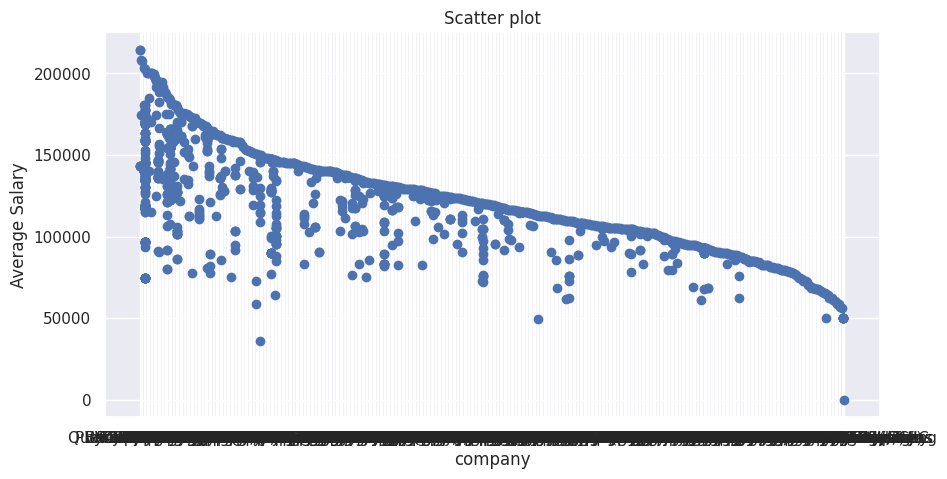

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_jobs1['company'], df_jobs1['Average Salary'])
plt.title('Scatter plot')
ax.set_ylabel('Average Salary')
ax.set_xlabel('company')
plt.show()

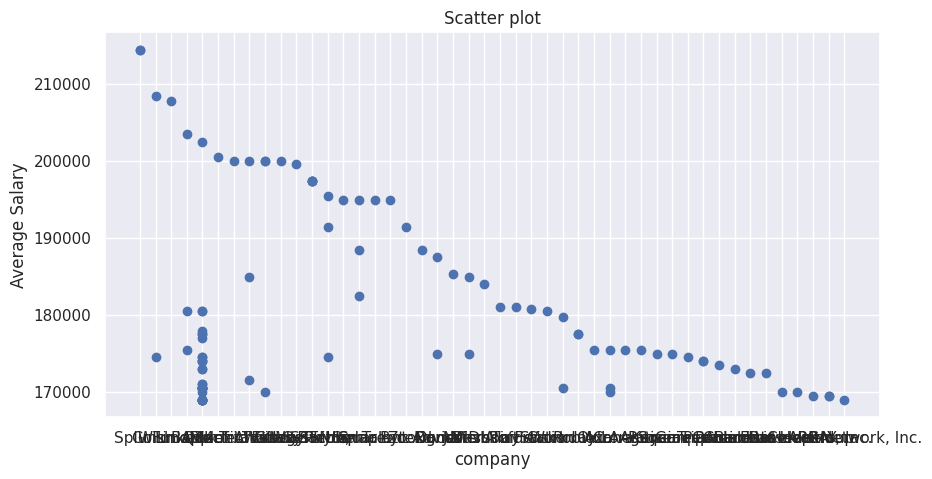

In [59]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_jobs1.head(100)['company'], df_jobs1.head(100)['Average Salary'])
plt.title('Scatter plot')
ax.set_ylabel('Average Salary')
ax.set_xlabel('company')
plt.show()

The above graphs depict a simpler scatter plot that helps to identify the same pattern as shown in the previous graphs.

We have included the following line graph to explain why we did not choose this type of graphing.

In [60]:
import plotly.express as px

fig = px.line(df_jobs1.head(500), x="months_experience", y="Average Salary", color='company')
fig.show()

**Data visualization summary:**

To visually represent the correlations and trends among different features such as months of experience, job function, location, and seniority level, we created multiple visualizations, with a special focus on scatter plots. We chose scatter plots because they are versatile and can accommodate multiple non-integer values as axes or legends. Additionally, we used the color feature to segregate the data by company, which added a new layer of insight into how different companies affect the average salary.

Upon careful examination of the graphs, it is clear that the primary factor contributing to a higher average salary is the company, surpassing the impact of any other feature. This is especially evident in the scatter plot where the color is set to seniority level. Each section of the bubble had the same trend, with the same few companies at the top of the salary scale, while the rest of the bubbles decreased with the same trend.

Other features also have a noticeable effect on the average salary, such as location and job function. Their respective graphs have unique clustering, and although the trend is not entirely clear, it is not restricted by the company.




## Data Preparation for Predictions

Although it was mentioned earlier that the dataset(s) were ready, there is still one final step that needs to be completed for machine learning. Currently, most of the features are in string data types, which was done intentionally for the data visualization phase. However, now they need to be encoded into integer values to represent the various companies for the algorithms to use during training and predictions.

This process is known as label encoding, where unique integers are assigned to represent the string so that the computer can process it.

In [61]:
from sklearn import preprocessing
#Creating label encoder
LabelEncoder = preprocessing.LabelEncoder()
#Columns to be converted
columnsToBeEncoded = df_jobs1[['Employment type', 'Industries', 'Job function', 'Seniority level', 'company', 'education', 'location', 'title']]

encoded_data = columnsToBeEncoded.apply(LabelEncoder.fit_transform)


In [62]:
df_jobs1pred = pd.concat([df_jobs1.drop(columnsToBeEncoded, axis=1), encoded_data], axis=1)


In [63]:
df_jobs1pred.head()

,months_experience,Average Salary,Employment type,Industries,Job function,Seniority level,company,education,location,title
1805,144.0,214500.0,1,69,12,6,395,1,232,184
1804,144.0,214500.0,1,69,12,6,395,1,231,184
3365,60.0,208500.0,1,49,20,5,480,1,257,237
2717,60.0,207900.0,1,203,12,0,189,1,229,232
6471,72.0,203500.0,1,186,10,6,253,1,250,483


In [64]:
df_jobs1pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 1805 to 3460
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   months_experience  1380 non-null   float64
 1   Average Salary     1380 non-null   float64
 2   Employment type    1380 non-null   int64  
 3   Industries         1380 non-null   int64  
 4   Job function       1380 non-null   int64  
 5   Seniority level    1380 non-null   int64  
 6   company            1380 non-null   int64  
 7   education          1380 non-null   int64  
 8   location           1380 non-null   int64  
 9   title              1380 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 118.6 KB


Now that the first dataframe, which includes months of experience, has been encoded, we can repeat the same process for the other dataframe that does not include this column.

In [65]:
#Columns to be converted
columnsToBeEncoded2 = df_jobs2[['Employment type', 'Industries', 'Job function', 'Seniority level', 'company', 'education', 'location', 'title']]

encoded_data2 = columnsToBeEncoded2.apply(LabelEncoder.fit_transform)

In [66]:
df_jobs2pred = pd.concat([df_jobs2.drop(columnsToBeEncoded2, axis=1), encoded_data2], axis=1)

In [67]:
df_jobs2pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 2 to 8258
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Average Salary   2024 non-null   float64
 1   Employment type  2024 non-null   int64  
 2   Industries       2024 non-null   int64  
 3   Job function     2024 non-null   int64  
 4   Seniority level  2024 non-null   int64  
 5   company          2024 non-null   int64  
 6   education        2024 non-null   int64  
 7   location         2024 non-null   int64  
 8   title            2024 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 158.1 KB


Now that the dataframes have been encoded into integer values, there is an opportunity to explore more diverse types of visualizations that can reveal potential correlations within the data.


<Axes: >

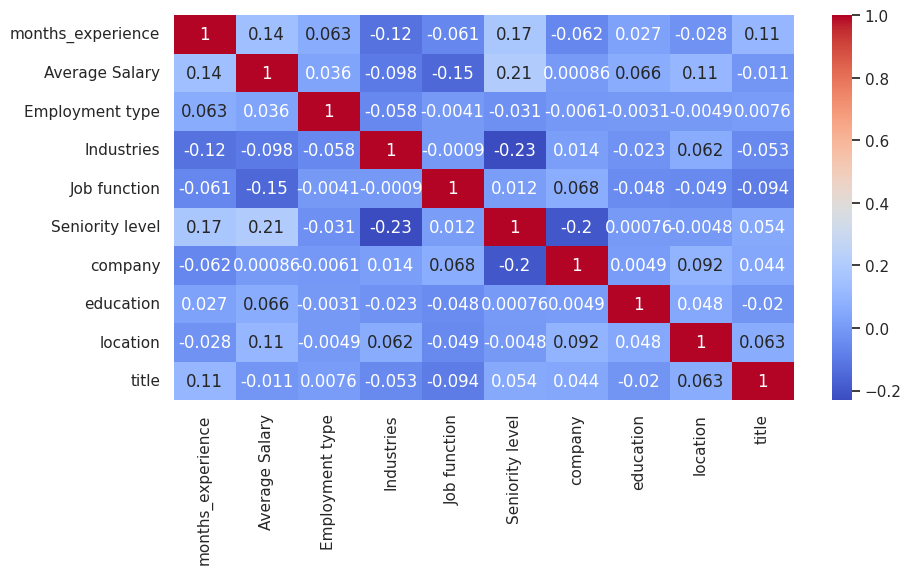

In [68]:
plt.figure(figsize=(10,5))
c= df_jobs1pred.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

<Axes: >

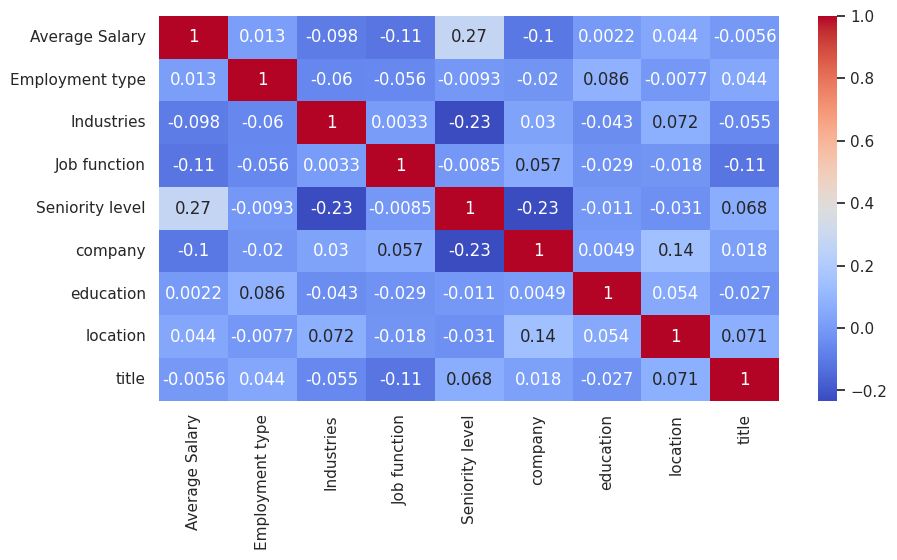

In [69]:
plt.figure(figsize=(10,5))
c= df_jobs2pred.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

As expected from the initial data visualizations, there isn't a strong mathematical correlation from any single feature. Since this is a complex prediction problem, it is not particularly a setback. We aim to see which algorithm gives the most accurate predictions by combining all of these features.

Comparing the correlation heatmaps of the dataframe subsets provides insightful information on which subset may yield better accuracy in predicting the Average Salary.

In both dataframes, Seniority level has the highest correlation coefficient. Interestingly, it increases in the dataset with more datapoints, while the coefficients of other features drop slightly.

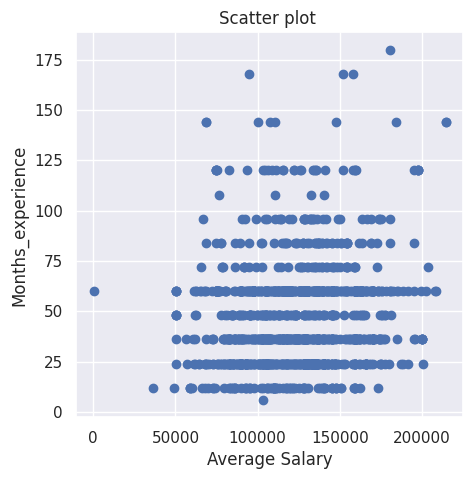

In [70]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_jobs1pred['Average Salary'], df_jobs1pred['months_experience'])
plt.title('Scatter plot ')
ax.set_xlabel('Average Salary')
ax.set_ylabel('Months_experience')
plt.show()

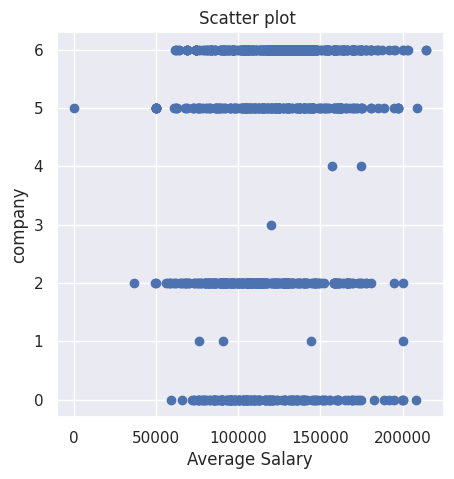

In [71]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_jobs1pred['Average Salary'], df_jobs1pred['Seniority level'])
plt.title('Scatter plot ')
ax.set_xlabel('Average Salary')
ax.set_ylabel('company')
plt.show()

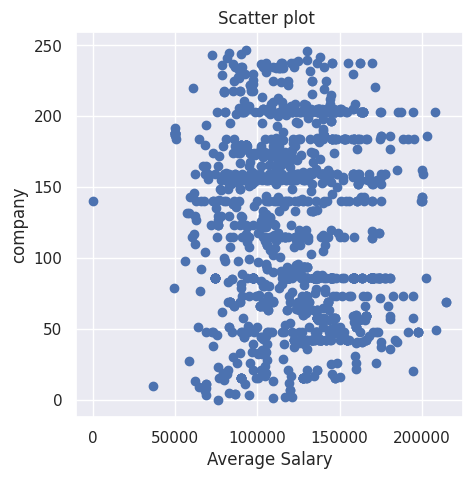

In [72]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_jobs1pred['Average Salary'], df_jobs1pred['Industries'])
plt.title('Scatter plot ')
ax.set_xlabel('Average Salary')
ax.set_ylabel('company')
plt.show()

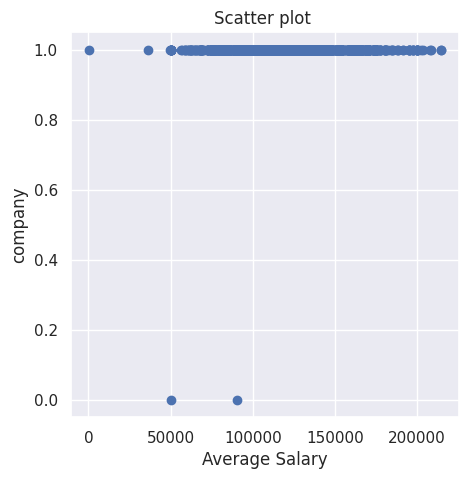

In [73]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_jobs1pred['Average Salary'], df_jobs1pred['education'])
plt.title('Scatter plot ')
ax.set_xlabel('Average Salary')
ax.set_ylabel('company')
plt.show()

The heatmaps also confirm that none of the features exhibit a strong correlation with the average salary.

#Machine Learning Predictions

##Machine Learning Attempts Without Normalizing Data

## Creating Test Data

Creating training test data... we decided to use an 80/20 split to learn and test.

In [74]:
from sklearn.model_selection import train_test_split

#Creating new dataset training names to be easier to call

X1 = df_jobs1pred.drop(['Average Salary'], axis=1)
X2= df_jobs2pred.drop(['Average Salary'], axis=1)
#Even though the target variable is the same, there are a different number of rows in the respective datasets
y1 = df_jobs1pred['Average Salary']
y2 = df_jobs2pred['Average Salary']

Training data for dataset 1:

In [75]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42) # 80% training and 20% test

Training data for dataset 2:

In [76]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42) # 80% training and 20% test

## Evaluation Metric (R^2)

We will be using the R^2 metric to evaluate the performance of our algorithms in this project.

Why use R^2 you might ask?

The R-squared (R^2) value serves as a fundamental statistical tool in regression analysis, playing a crucial role in evaluating the degree of fit of a given model. It gauges the extent to which independent variables explain the variance observed in the target variable. In general, a high R^2 value conveys that the model accurately fits the data, while a low R^2 value implies the contrary. Nonetheless, it is crucial to note that the interpretation of R^2 value is not always straightforward, and it depends on the specific context and purpose of the model.

In our project, we have come across the relationship between independent variables and average salary. This challenge primarily stems from the existence of confounding variables, which are not under our direct observation or control. These confounding variables may potentially have an indirect impact on average salary, making it challenging to measure or precisely capture their impact in the model. In this case a low R-squared value is said to be acceptable, signifying that the model captures the essential attributes of the variable relationship, Although insufficiently.

Furthermore, in some cases, the primary objective of the model may be to come to know the most influential variables or to gain insights into the relationship between them, rather than to achieve highly accurate salary predictions. In conclusion, while a low R-squared value may not necessarily be desirable, it should not be seen as an impediment to progress, as it may still facilitate valuable insights into the variable relationship, especially when contextualized and approached with appropriate limitations and caution.

## Model 1: Linear Regression

###**Dataset 1**:

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression()

In [78]:
y1_pred = regressor.predict(X1_test)

In [79]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1_test, y1_pred)
mse

822638051.5145247

In [80]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
rmse

28681.66751628163

In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(y1_test, y1_pred)
r2

0.06472552778084639

###**Dataset 2:**

In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X2_train, y2_train)
y2_pred = regressor.predict(X2_test)

In [83]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y2_test, y2_pred)
mse

964975945.8381983

In [84]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
rmse

28681.66751628163

In [85]:
from sklearn.metrics import r2_score
r2 = r2_score(y2_test, y2_pred)
r2

0.04890843626194452

### Comments on linear regression:
As anticipated, linear regression proved ineffective in predicting salary, as there was no evident linear correlation among the data. Therefore, for the next model(s), we will explore non-linear regression options, as it is apparent that our data does not follow a linear pattern.

## Model 2: Generalized Additive Models

Generalized Additive Models (GAMs) are an extension of the linear regression model that offer more flexibility in terms of functional forms. This approach can capture complex, nonlinear relationships between variables by fitting smooth curves and surfaces to the data. GAMs are a powerful tool for modeling both continuous and categorical variables.


###**Dataset 1**:

In [86]:
!pip install pygam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [87]:
import pygam
from sklearn.metrics import mean_squared_error, r2_score
# Create and fit the model
model = pygam.GAM().fit(X1_train, y1_train)

# Predict on test data
y1_pred = model.predict(X1_test)

In [88]:
# Evaluate the model
rmse = mean_squared_error(y1_test, y1_pred, squared=False)
r2 = r2_score(y1_test, y1_pred)
print("RMSE:", rmse)
print("R^2:", r2)


RMSE: 24700.077007824555
R^2: 0.306371544970763


###**Dataset 2**:

In [89]:
import pygam
from sklearn.metrics import mean_squared_error, r2_score
# Create and fit the model
model = pygam.GAM().fit(X2_train, y2_train)

# Predict on test data
y2_pred = model.predict(X2_test)

In [90]:
# Evaluate the model
rmse = mean_squared_error(y2_test, y2_pred, squared=False)
r2 = r2_score(y2_test, y2_pred)
print("RMSE:", rmse)
print("R^2:", r2)


RMSE: 26541.142248060598
R^2: 0.30570336409948073


### Comments on GAM

Although the R^2 value still falls short of being a "good" score, it represents a significant improvement from the previous regression model. This indicates that we are making progress in identifying more effective algorithms for predicting salary.

## Model 3: Decision Trees

Decision trees: By segmenting the data into smaller subsets based on the values of the independent variables, this model can identify non-linear relationships. The decision rules created by this model can be organized into a tree-like structure that can accurately predict the value of the dependent variable using the independent variables.

###**Dataset 1**:

In [91]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the model
model = DecisionTreeRegressor(max_depth=6)
model.fit(X1_train, y1_train)

# Predict on test data
y1_pred = model.predict(X1_test)

In [92]:
# Evaluate the model
rmse = mean_squared_error(y1_test, y1_pred, squared=False)
r2 = r2_score(y1_test, y1_pred)
print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 26025.73623957638
R^2: 0.22991913050124102


###**Dataset 2**:

In [93]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the model
model = DecisionTreeRegressor(max_depth=6)
model.fit(X2_train, y2_train)

# Predict on test data
y2_pred = model.predict(X2_test)

In [94]:
# Evaluate the model
rmse = mean_squared_error(y2_test, y2_pred, squared=False)
r2 = r2_score(y2_test, y2_pred)
print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 28052.811444384464
R^2: 0.22436280519134733


### Comments on Decision Tree's
This model was not able to perform better than the previous model, this is possibly due to the lack of correlations or the amount of rows available.

## Model 4: Neural Networks

Neural networks: This model is capable of handling non-linear data by utilizing multiple interconnected layers of nodes that can capture intricate patterns in the data.

###**Dataset 1**:

In [95]:
from sklearn.preprocessing import RobustScaler
# Normalize the input features
scaler = RobustScaler()
X_train = scaler.fit_transform(X1_train)
X_test = scaler.transform(X1_test)

To improve convergence during training and prevent the model from getting stuck in local minima, we will normalize the input features. This can be achieved by using the StandardScaler from scikit-learn to scale the features.

In [96]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Use early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y1_train, epochs=1000, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stop])

In [97]:
# Predict on test data
y1_pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [98]:
# Evaluate the model
rmse = mean_squared_error(y1_test, y1_pred, squared=False)
r2 = r2_score(y1_test, y1_pred)
print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 28718.09936551152
R^2: 0.06234802172876053


###**Dataset 2**:

In [99]:
from sklearn.preprocessing import RobustScaler
# Normalize the input features
scaler = RobustScaler()
X3_train = scaler.fit_transform(X2_train)
X3_test = scaler.transform(X2_test)


In [100]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X3_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Use early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X3_train, y2_train, epochs=1000, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stop])

In [101]:
# Evaluate the model
rmse = mean_squared_error(y2_test, y2_pred, squared=False)
r2 = r2_score(y2_test, y2_pred)
print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 28052.811444384464
R^2: 0.22436280519134733


### Comments on Neural Networks
This particular model had the longest run time compared to all the other models. Although initially there were high hopes of its performance, it ended up with negative R^2 values for both datasets. After extensive research, normalization was one of the last techniques that was applied to improve the model. While it did not yield a strong correlation, it at least showed some improvement from its previous state.

Furthermore, we now observe a significant difference in model performance between dataset 1 and dataset 2. It is possible that the neural network model performs better with more data entries than the additional feature.

Therefore, to investigate this further, after testing more algorithms, we will repeat the best-performing ones with normalized training data to see if it enhances the results.

## Model 5: Random Forest Regression
Random forest regression models use multiple decision trees constructed with different subsets of input variables and training data. These trees' results are then combined to make a final prediction, which is a weighted average of the individual tree predictions. The random selection of variables and data subsets can help reduce overfitting and improve the model's generalization performance.

###**Dataset 1**:

In [102]:
from sklearn.ensemble import RandomForestRegressor
# Create a random forest regression model with 100 trees
rf = RandomForestRegressor(n_estimators=600, random_state=42)

# Fit the model to the training data
rf.fit(X1_train, y1_train)

# Predict the target variable for the test data
y1_pred = rf.predict(X1_test)

In [103]:
# Calculate the mean squared error
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
print('Mean Squared Error:', mse)
print("R^2:", r2)

Mean Squared Error: 482599151.77578163
R^2: 0.45132289207930476


The random_state parameter is used in many machine learning libraries, including scikit-learn and XGBoost, to set the random seed used for random number generation during the training of the model.

Random number generation is often used in machine learning algorithms, for example, to randomly initialize weights in neural networks, randomly sample data points during training, or randomly split data into training and validation sets.

By setting the random_state parameter to a fixed integer, you can ensure that the random number generator is initialized with a specific seed, which will result in the same sequence of random numbers being generated every time you run the same code with the same seed. This can be useful for ensuring the reproducibility of your results and for debugging purposes.

For instance, if you set random_state=42 when training a model, and then re-run the same code with the same random_state parameter, you should obtain the same results. However, if you change the random_state parameter or use a different dataset, you will likely get different results.

###**Dataset 2**:

In [104]:
# Create a random forest regression model with 100 trees
rf = RandomForestRegressor(n_estimators=400, random_state=42)

# Fit the model to the training data
rf.fit(X2_train, y2_train)

# Predict the target variable for the test data
y2_pred = rf.predict(X2_test)

In [105]:
# Calculate the mean squared error
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
print('Mean Squared Error:', mse)
print("R^2:", r2)

Mean Squared Error: 479950537.81185466
R^2: 0.5269551438114946


### Comments on Random Forest Regression

This algorithm has shown the highest performance among all tested models so far. As observed before, dataset 2 outperformed dataset 1, but this algorithm performed well on both datasets compared to other models. This could be attributed to the fact that random forest is a popular model in the industry for both classification and regression tasks, due to its ability to handle complex data, reduce bias, and prevent overfitting.

## Model 6: Elastic Net Regression

The Elastic Net regularization technique is a powerful method that combines both L1 (Lasso) and L2 (Ridge) regularization techniques. It is often utilized for high-dimensional datasets with correlated input features. The Elastic Net penalty term involves two hyperparameters: alpha and l1_ratio. The alpha parameter determines the magnitude of regularization, whereas the l1_ratio parameter adjusts the balance between L1 and L2 regularization.

###**Dataset 1**:

In [106]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Create an instance of ElasticNet regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Train the model on the training set
elastic_net.fit(X1_train, y1_train)

# Make predictions on the testing set
y1_pred = elastic_net.predict(X1_test)

In [107]:
# Evaluate the model's performance using R-squared
r2 = r2_score(y1_test, y1_pred)
print("R-squared score: ", r2)

R-squared score:  0.06330022657883949


###**Dataset 2**:

In [108]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Create an instance of ElasticNet regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Train the model on the training set
elastic_net.fit(X2_train, y2_train)

# Make predictions on the testing set
y2_pred = elastic_net.predict(X2_test)

# Evaluate the model's performance using R-squared
r2 = r2_score(y2_test, y2_pred)
print("R-squared score: ", r2)

R-squared score:  0.06766380428577456


### Comments on Elastic Net Regression

This result is quite surprising as the data appears to be challenging for multiple algorithms. Initially, it was assumed that regularization of the data would lead to better results, or at least better than those of linear regression.

However, the low results obtained clearly demonstrate that regularization is not an effective approach to improve predictions in this case.

## Model 7: XGBoost - Extreme Gradient Boosting


XGBoost is a popular machine learning library for building predictive models using gradient boosting algorithms. Gradient boosting is an ensemble learning method that combines multiple weak models, typically decision trees, to create a stronger overall model.

XGBoost stands for "Extreme Gradient Boosting", and it is designed to be highly scalable, making it suitable for large datasets with a high number of features. It can handle a variety of data types, including continuous and categorical variables, and supports both regression and classification tasks.

One of the key features of XGBoost is its ability to handle missing data and handle outliers, which can help improve model accuracy. Additionally, XGBoost provides various hyperparameters that can be tuned to optimize the model's performance, such as the learning rate, maximum depth of trees, and regularization parameters.

###**Dataset 1**:

In [109]:
import xgboost as xgb
from sklearn.metrics import r2_score

# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_model.fit(X1_train, y1_train)

# Predict the target variable for the test data
y1_pred = xgb_model.predict(X1_test)

# Calculate the R-squared value
r2 = r2_score(y1_test, y1_pred)
print('R-squared:', r2)

R-squared: 0.4568455748775976


###**Dataset 2**:

In [110]:
import xgboost as xgb
# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_model.fit(X2_train, y2_train)

# Predict the target variable for the test data
y2_pred = xgb_model.predict(X2_test)

# Calculate the R-squared value
r2 = r2_score(y2_test, y2_pred)
print('R-squared:', r2)

R-squared: 0.5163743027586625


The objective parameter in XGBoost specifies the loss function that the model should use to optimize the objective. Here are some common options for the objective parameter in XGBoost for regression and classification tasks, along with a brief description of what they do:

Regression:

reg:squarederror (default): Standard linear regression with squared loss.
reg:squaredlogerror: Same as squared error but takes the logarithm of the target variable.
reg:logistic: Logistic regression for binary classification, outputs probability.
reg:pseudohubererror: Pseudo-Huber regression, which is less sensitive to outliers.

In [111]:
import xgboost as xgb
# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:squaredlogerror', random_state=42)

# Fit the model to the training data
xgb_model.fit(X2_train, y2_train)

# Predict the target variable for the test data
y2_pred = xgb_model.predict(X2_test)

# Calculate the R-squared value
r2 = r2_score(y2_test, y2_pred)
print('R-squared:', r2)

R-squared: -15.320026377742309


In [112]:
import xgboost as xgb
# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:pseudohubererror', random_state=42)

# Fit the model to the training data
xgb_model.fit(X2_train, y2_train)

# Predict the target variable for the test data
y2_pred = xgb_model.predict(X2_test)

# Calculate the R-squared value
r2 = r2_score(y2_test, y2_pred)
print('R-squared:', r2)

R-squared: -15.349135821066596


### Comments on XG Boost:

XG Boost is on the similar level of performance as random forest regression, which is not completely unsurprising since both are ensemble models which combines multiple weaker models.

The trend of dataset 2 outperforming dataset 1 continuously is not surprising.

## Model 8: KNN Model - K Nearest Neighbors



K-Nearest Neighbors (KNN) is a simple and popular machine learning algorithm used for both classification and regression tasks. In KNN, the goal is to predict the label or value of a new instance based on its similarity to existing instances in the dataset.

For a given new instance, KNN searches the training dataset for the k instances that are closest to the new instance in terms of some distance metric, typically Euclidean distance. The predicted label or value for the new instance is then determined by taking the average (in regression) or majority vote (in classification) of the labels or values of the k nearest neighbors.

KNN is a non-parametric algorithm, which means it doesn't make any assumptions about the underlying distribution of the data, unlike parametric models such as linear regression. It can be used for both binary and multi-class classification, as well as regression tasks.

###**Dataset 1**:

In [113]:
from sklearn.neighbors import KNeighborsRegressor

# Create KNN regression model 
knn = KNeighborsRegressor(n_neighbors=13)

# Fit the model on the training data
knn.fit(X1_train, y1_train)

# Make predictions on the testing data
y1_pred = knn.predict(X1_test)

# Evaluate the model performance 
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
print("Mean squared error:", mse)
print('R-squared:', r2)

Mean squared error: 718156135.7528567
R-squared: 0.18351321142924226


###**Dataset 2**:

In [114]:
from sklearn.neighbors import KNeighborsRegressor
# Create KNN regression model
knn = KNeighborsRegressor(n_neighbors=10)

# Fit the model on the training data
knn.fit(X2_train, y2_train)

# Make predictions on the testing data
y2_pred = knn.predict(X2_test)

# Evaluate the model performance 
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
print("Mean squared error:", mse)
print('R-squared:', r2)

Mean squared error: 730978526.3160493
R-squared: 0.2795390261785422


### Comments on KNN model:

We had higher expectations for this model, as it relies on a distance measure, typically Euclidean, to make predictions. Given that the data is nonlinearly distributed and not easily modeled mathematically, we assumed that such an algorithm would perform well.

However, even though it wasn't the best performer, it's important to note that it still outperformed mathematical models such as linear regression.

Lastly, it's worth highlighting that dataset 2 outperformed dataset 1 once again.

## Model 9: Stacking the Best Algorithms - Ensemble

We aimed to maximize our chances of achieving the best-performing model by combining the two best models so far: random forest and XG Boost.

To do this, we developed a stacking function that takes in the base models, meta-model, training, and testing data. The function performs stacking by first splitting the training data into 5 folds using KFold, then training each base model on each fold, and making predictions on the validation set. These predictions are then added to a train predictions array, which is used to fit the meta-model. Finally, the base models make predictions on the testing set, and the predictions are added to a test predictions array.

###**Dataset 1**:

In [115]:
# import libraries
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# define base models
base_models = [RandomForestRegressor(n_estimators=100, random_state=42),
               xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                ]

# define meta-model
meta_model = LinearRegression()

# create stacking function
def stacking(base_models, meta_model, X1_train, y1_train, X1_test):
    # create empty arrays for train and test predictions
    train_pred = np.zeros((X1_train.shape[0], len(base_models)))
    test_pred = np.zeros((X1_test.shape[0], len(base_models)))
    
    # create KFold object
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # iterate over base models
    for i, model in enumerate(base_models):
        # iterate over folds
        for train_idx, val_idx in kf.split(X1_train, y1_train):
            # split data into train and validation sets
            X1_train_fold = X1_train.iloc[train_idx]
            y1_train_fold = y1_train.iloc[train_idx]
            X1_val_fold = X1_train.iloc[val_idx]
            y1_val_fold = y1_train.iloc[val_idx]
            
            # train base model on fold
            model.fit(X1_train_fold, y1_train_fold)
            
            # make predictions on validation set and add to train predictions array
            val_pred_fold = model.predict(X1_val_fold)
            train_pred[val_idx, i] = val_pred_fold
            
        # make predictions on testing set and add to test predictions array
        test_pred[:, i] = model.predict(X1_test)
        
    # fit meta-model on train predictions and make final prediction on test predictions
    meta_model.fit(train_pred, y1_train)
    final_pred = meta_model.predict(test_pred)
    
    return final_pred

# use stacking function to make predictions
stacking_pred = stacking(base_models, meta_model, X1_train, y1_train, X1_test)

# evaluate performance
print("Stacking Performance:")
print("Mean Squared Error:", mean_squared_error(y1_test, stacking_pred))
print("R-squared Score:", r2_score(y1_test, stacking_pred))

Stacking Performance:
Mean Squared Error: 464778398.5151468
R-squared Score: 0.4715836806116399


###**Dataset 2**:

In [116]:
# import libraries
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# define base models
base_models = [RandomForestRegressor(n_estimators=100, random_state=42),
               xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
               ]

# define meta-model
meta_model = LinearRegression()

# create stacking function
def stacking(base_models, meta_model, X2_train, y2_train, X2_test):
    # create empty arrays for train and test predictions
    train_pred = np.zeros((X2_train.shape[0], len(base_models)))
    test_pred = np.zeros((X2_test.shape[0], len(base_models)))
    
    # create KFold object
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # iterate over base models
    for i, model in enumerate(base_models):
        # iterate over folds
        for train_idx, val_idx in kf.split(X2_train, y2_train):
            # split data into train and validation sets
            X2_train_fold = X2_train.iloc[train_idx]
            y2_train_fold = y2_train.iloc[train_idx]
            X2_val_fold = X2_train.iloc[val_idx]
            y2_val_fold = y2_train.iloc[val_idx]
            
            # train base model on fold
            model.fit(X2_train_fold, y2_train_fold)
            
            # make predictions on validation set and add to train predictions array
            val_pred_fold = model.predict(X2_val_fold)
            train_pred[val_idx, i] = val_pred_fold
            
        # make predictions on testing set and add to test predictions array
        test_pred[:, i] = model.predict(X2_test)
        
    # fit meta-model on train predictions and make final prediction on test predictions
    meta_model.fit(train_pred, y2_train)
    final_pred = meta_model.predict(test_pred)
    
    return final_pred

# use stacking function to make predictions
stacking_pred = stacking(base_models, meta_model, X2_train, y2_train, X2_test)

# evaluate performance
print("Stacking Performance:")
print("Mean Squared Error:", mean_squared_error(y2_test, stacking_pred))
print("R-squared Score:", r2_score(y2_test, stacking_pred))

Stacking Performance:
Mean Squared Error: 475791864.4463136
R-squared Score: 0.5310539808564663


### Comments on stacking:

Although we achieved the highest R^2 score with this model, it is unfortunate that the improvement is not significant compared to XG Boost or Random Forest. It is possible that the similarity in prediction style between these models contributed to the lack of significant improvement.

However, we have reached the end of our model testing as we were unable to find any models that were sufficiently different from those we have already tested and that were not linear-based.

As is tradition now, dataset 2 has outperformed dataset 1.

## Machine Learning Attempts With Normalizing Data

## Creating Test Data

In [117]:
# Normalize the input features of data set 1
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
XN1_train = scaler.fit_transform(X1_train)
XN1_test = scaler.transform(X1_test)

# Normalize the input features of data set 2
scaler = RobustScaler()
XN2_train = scaler.fit_transform(X2_train)
XN2_test = scaler.transform(X2_test)

RobustScaler is a machine learning data preprocessing technique used to normalize input features in a dataset. It scales the data so that it has a median of 0 and an interquartile range (IQR) of 1, which reduces the impact of outliers on the dataset. In Python, the sklearn.preprocessing module provides the RobustScaler function, which applies the robust scaling transformation to the input features of a dataset. The function calculates the median and IQR of each feature and scales the feature values accordingly.

## Attempt 2: Linear Regression

###**Dataset 1**:

In [118]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(XN1_train, y1_train)
y1_pred = regressor.predict(XN1_test)

from sklearn.metrics import r2_score
r2 = r2_score(y1_test, y1_pred)
r2

0.06472552778084528

###**Dataset 2**:

In [119]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(XN2_train, y2_train)
y2_pred = regressor.predict(XN2_test)

from sklearn.metrics import r2_score
r2 = r2_score(y2_test, y2_pred)
r2

0.0489084362619453

### Comments on linear attempt 2:

No significant improvements at all.

Lastly, we are going to try the normalized data on the better performing algorithms from the tested algorithms above: random forest and XGBoost.

## Attempt 2: Random Forest Regression

###**Dataset 1**:

In [120]:
from sklearn.ensemble import RandomForestRegressor
# Create a random forest regression model
rf = RandomForestRegressor(n_estimators=600, random_state=42)

# Fit the model to the training data
rf.fit(XN1_train, y1_train)

# Predict the target variable for the test data
y1_pred = rf.predict(XN1_test)

# Calculate the mean squared error
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
print('Mean Squared Error:', mse)
print("R^2:", r2)

Mean Squared Error: 482780604.2034534
R^2: 0.4511165950046543


###**Dataset 2**:

In [121]:
from sklearn.ensemble import RandomForestRegressor
# Create a random forest regression model
rf = RandomForestRegressor(n_estimators=400, random_state=42)

# Fit the model to the training data
rf.fit(XN2_train, y2_train)

# Predict the target variable for the test data
y2_pred = rf.predict(XN2_test)

# Calculate the mean squared error
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
print('Mean Squared Error:', mse)
print("R^2:", r2)

Mean Squared Error: 479730578.34764266
R^2: 0.5271719384286854


### COmments on attempt 2: RFG

No significant changes once again from the RFG attempt before.

## Attempt 2: XGBoost - Extreme Gradient Boosting

###**Dataset 1**:

In [122]:
import xgboost as xgb
from sklearn.metrics import r2_score

# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_model.fit(XN1_train, y1_train)

# Predict the target variable for the test data
y1_pred = xgb_model.predict(XN1_test)

# Calculate the R-squared value
r2 = r2_score(y1_test, y1_pred)
print('R-squared:', r2)

R-squared: 0.4540125952898423


###**Dataset 2**:

In [123]:
import xgboost as xgb
# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_model.fit(XN2_train, y2_train)

# Predict the target variable for the test data
y2_pred = xgb_model.predict(XN2_test)

# Calculate the R-squared value
r2 = r2_score(y2_test, y2_pred)
print('R-squared:', r2)

R-squared: 0.5108914238911137


### Comments on attempt 2: XG Boost

No significant changes from the first XGBoost attempt.

Given the lack of significant improvement with the last two algorithms, stacking on the same data again would be impractical and unlikely to yield a major boost in prediction accuracy.

# Conclusions

The visualizations and heatmaps indicated that none of the features had a significant impact on their own, nor did any feature have a clear and direct mathematical relationship with the average salary. Explanatory variables, such as the geographical location of the company, have an influence on the average salary, however, the relationship was weaker than expected. The visualizations also indicated that the company's interpreted seniority level of a position had the strongest influence on the average salary. 




The team compared the R^2 of a linear regression model, XGBoost Algorithm, Random Forest Algorithm, Neural Networks, and the Elastic Net Regression model. The different models are driven by different underlying assumptions and techniques, which resulted in different levels of performance when predicting the average salary. 
The linear regression models were not an accurate method to predict the average salary. The linear regression model performed extremely poorly as determined by the R-squared value. This was because the data was not linearly distributed.

In contrast, the two ‘ensemble’ algorithms: XGBoost and Random Forest performed very well. This is unexpected as these two algorithms are recognized in the industry for handling complicated datasets. The XGBoost and Random Forest algorithm reduce bias within the data and limits the level of overfitting. 

The neural networks initially showed low performance which the team determined was a result of the data not being normalized as well as the impact of outliers in the training data. Neural networks are much more sensitive to outliers as compared to the other models leveraged in this project. 

The Elastic Net Regression model performed very poorly, similar to the linear regression model. Normalizing the data did not yield any improvements in the accuracy of the prediction when tested on the training data. The Elastic Net Regression utilizes two regularization techniques, L1 and L2. These two techniques improve th and reduce overfitting. Elastic Net regression uses two popular regularization techniques: lasso regression (L1) and ridge regression (L2). Cross-validation methods handle overfitting appropriately with a small set of features, however, the L1 and L2 regularization methods yield better results when working with a large set of features. 

This was a difficult yet interesting problem to solve. The data exploration, visualization, and predictions clearly indicate there was no ideal feature that would correlate directly to the average salary. After an iterative process of training and testing different models, it was clear that XGBoost and Random Forest predicted the average salary with more accuracy in comparison to the other models. 

It was also discovered that the benefit of removing a low correlated feature outweighed the loss of having less rows in the dataset. A greater number of data points and rows improved all of the model’s accuracy, much more than keeping more features but removing the rows during normalization. 



The implications of these results is that the “average salary” of a position is an aggregation of a number of underlying factors with varying degrees of effect. This topic would require further research to determine the correlated factors such as bank interest rates, market sentiments, and securities exchange. 

Furthermore, it indicates that the government’s approach to regularizing this aspect of the job market and forcing companies to introduce a salary range is the correct way forward. Until an appropriate salary range is listed on job postings, services such as Glassdoor can be relied on as a fair indicator of the company’s pay relative scale. 



Attempting to apply various different algorithms and feature engineering techniques to improve the strength of predictions was extremely interesting as we went along. Researching and attempting model after model, viewing its performance and analyzing why it possibly performed better/worse than the one before leading to researching for the next model to attempt was a unique iterative process helped understand how the different regression models work in different scenarios, and also understanding the pros and cons of using each model in a different scenario. 
The team was also surprised by the fact that techniques such as normalizing and regularizing the data did not have a real impact in some of the test models. It was our understanding that any model  can be improved by at least a noticeable level as the data is directly improved. However, the lack of improvement shows that machine learning relies on a complicated layer of problem solving and developing each model requires a dedicated understanding of the problem itself, as well as the models that are being tested and leveraged. 


With respect to the algorithm, the cross fold validation and grid search technique was used in the Random Forest model. It would be beneficial to explore, deeply understand and further fine tune this algorithm itself.
 In addition, the size of the training dataset must be increased by combining multiple different sources of datasets. The size of the dataset used in this project was limited due to time and resource constraints, however, it is imperative to have a larger dataset to reduce the level of bias and effect of outliers. It would also be beneficial to spend more time on understanding which non-intuitive factor may significantly affect the average salary. The more known features, such as geographical location and company size can be constrained to merely focus on finding exploratory variables which are not intuitively linked to the average salary, but have a considerable effect. 


# Bibliography

Works Cited
1. Rosenquist, Joy C., and Denise M. Visconti. “California Releases Guidance on Pay Transparency Law.” SHRM, 3 January 2023, https://www.shrm.org/resourcesandtools/legal-and-compliance/state-and-local-updates/pages/california-pay-transparency-guidance.aspx. Accessed 14 February 2023.
2. “Mlawrence95/LinkedIn-Tech-Job-Data: A compilation of job posts and metadata scraped from various tech categories on LinkedIn.” GitHub, https://github.com/Mlawrence95/LinkedIn-Tech-Job-Data. Accessed 14 February 2023.
3. “A Stochastic Parts Program and Noun Phrase Parser for Unrestricted Text.” CiteSeerX, https://dl.acm.org/doi/abs/10.1145/3132847.3132863. Accessed 14 February 2023.
4. “Most Popular Regression in Machine Learning Techniques.” Shiksha, https://www.shiksha.com/online-courses/articles/most-popular-regression-in-machine-learning-techniques/. Accessed 6 April 2023.
5. Narang, Mohita. “One hot encoding vs label encoding in Machine Learning.” Shiksha, 24 January 2023, https://www.shiksha.com/online-courses/articles/one-hot-encoding-vs-label-encoding/. Accessed 6 April 2023.
6. Rao, Archana. “10 Popular Regression Algorithms In Machine Learning Of 2022.” UNext, https://u-next.com/blogs/machine-learning/popular-regression-algorithms-ml/. Accessed 6 April 2023.
7. Rao, Archana. “10 Popular Regression Algorithms In Machine Learning Of 2022.” UNext, https://u-next.com/blogs/machine-learning/popular-regression-algorithms-ml/. Accessed 6 April 2023.
8. Rice, Damien, and Matt Galbraith. “.,.” ., - YouTube, 16 November 2008, https://dl.acm.org/doi/abs/10.1145/3132847.3132863. Accessed 6 April 2023.
9. “3.3. Metrics and scoring: quantifying the quality of predictions.” Scikit-learn, https://scikit-learn.org/stable/modules/model_evaluation.html. Accessed 6 April 2023.

